In [84]:
import matplotlib.pyplot as plt
import numpy as np
import os
import scipy.stats as stats
cwd = os.getcwd()
plots = os.path.join(cwd,'plots')
max_anlge = 59.2 #deg

# data files for the 180 test:
data_180 = (np.loadtxt(cwd + r'\data\new_tia.csv', skiprows=1, delimiter=',')).T
print(data_180.shape)
time = (data_180[0] - data_180[0][0])*1e-6

# data files for the 90 deg test:

# data files for the 45 deg test:

#data files for the 135 deg test:

(11, 2100)


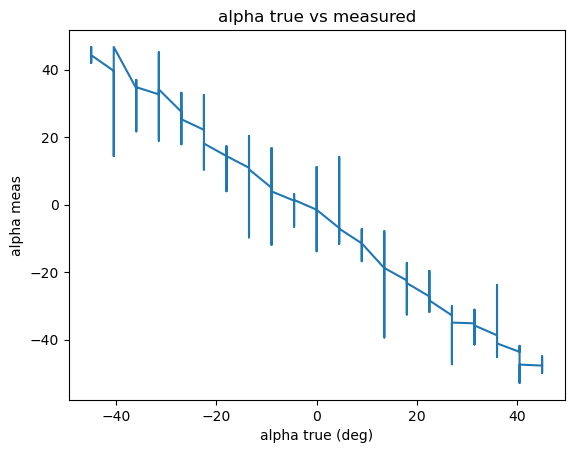

In [85]:
#Plot angle alpha against the true angle alpha. They are opposite for the 180 case
plt.plot(data_180[1]*0.9/16, data_180[9])
plt.title("alpha true vs measured")
plt.ylabel("alpha meas")
plt.xlabel("alpha true (deg)")
plt.show()
dgs = (data_180[1] * 0.9 / 16 < 59.2) & (data_180[1] * 0.9 / 16 > -59.2)
(data_180[9][dgs] + (data_180[1]*0.9/16)[dgs]).reshape(-1,)
freq = np.fft.rfftfreq(len(time[dgs]), time[1]-time[0])

In [86]:
#np.where(np.tan(data_180[1]*0.9/16/180*np.pi)==np.nan)
data_180[7][dgs]

array([ 1.  ,  1.01,  0.9 , ..., -1.11, -1.14, -1.1 ])

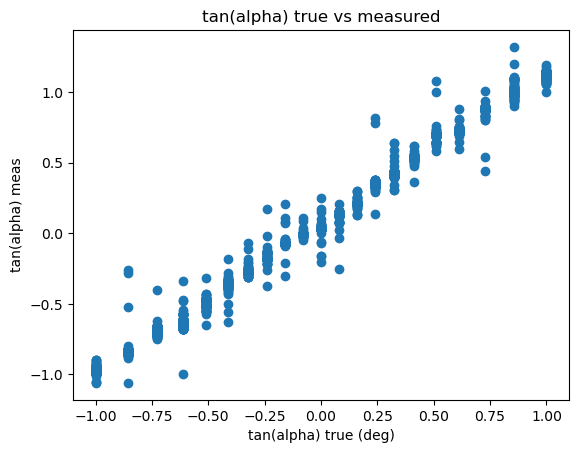

In [87]:
# now do the same with the tangent angles:
#Plot angle alpha against the true angle alpha. They are opposite for the 180 case
true_tangents = np.tan(data_180[1]*0.9/16/180*np.pi)[dgs]
plt.scatter(np.tan(data_180[1]*0.9/16/180*np.pi)[dgs], -data_180[7][dgs])
plt.title("tan(alpha) true vs measured")
plt.ylabel("tan(alpha) meas")
plt.xlabel("tan(alpha) true (deg)")
plt.show()
dgs = (data_180[1] * 0.9 / 16 < 59.2) & (data_180[1] * 0.9 / 16 > -59.2)
(data_180[9][dgs] + (data_180[1]*0.9/16)[dgs]).reshape(-1,)
freq = np.fft.rfftfreq(len(time[dgs]), time[1]-time[0])

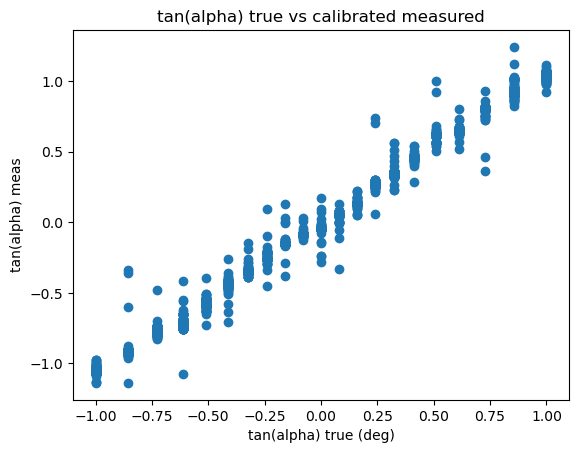

In [88]:
# calibrate with a constant by removing the average error
avg_err = np.average(np.tan(data_180[1]*0.9/16/180*np.pi)[dgs] - data_180[7][dgs])
corrected = -data_180[7][dgs] - avg_err
plt.scatter(np.tan(data_180[1]*0.9/16/180*np.pi)[dgs], corrected)
plt.title("tan(alpha) true vs calibrated measured")
plt.ylabel("tan(alpha) meas")
plt.xlabel("tan(alpha) true (deg)")
plt.show()

In [89]:
#plot error histogram
calibrated_error = corrected

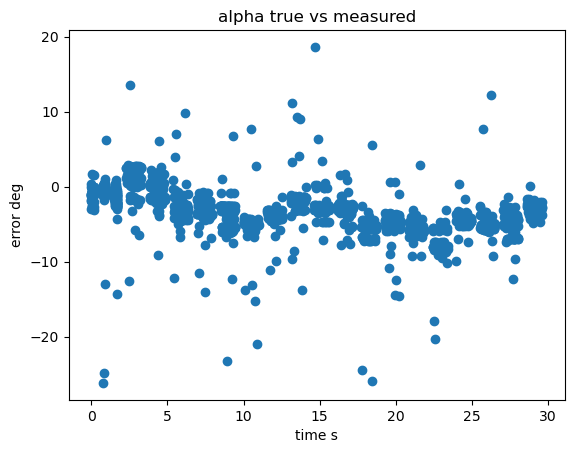

In [94]:
# do the error measurement
plt.scatter(time[dgs], (data_180[9]+data_180[1]*0.9/16)[dgs])
plt.title("alpha true vs measured")
plt.ylabel("error deg")
plt.xlabel("time s")
plt.show()
dgs = (data_180[1] * 0.9 / 16 < 59.2) & (data_180[1] * 0.9 / 16 > -59.2)
(data_180[9][dgs] + (data_180[1]*0.9/16)[dgs]).reshape(-1,)
freq = np.fft.rfftfreq(len(time[dgs]), time[1]-time[0])

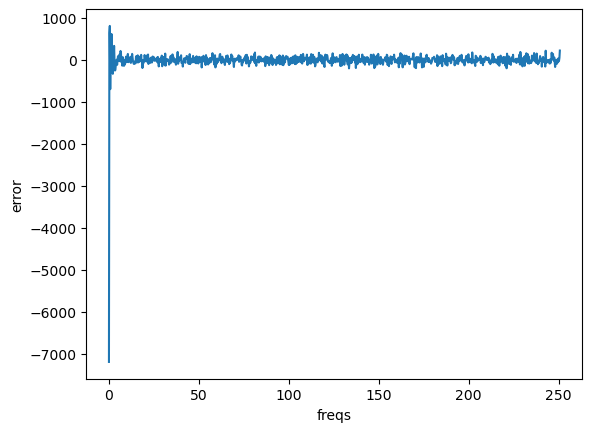

In [91]:
error = (data_180[9] + data_180[1]*0.9/16)[dgs]
error_fft = np.fft.rfft(error)
#We see a misalignment with period of 200 seconds this is a freq of 0.005
plt.plot(freq, error_fft)
plt.xlabel("freqs")
plt.ylabel("error")
plt.show()

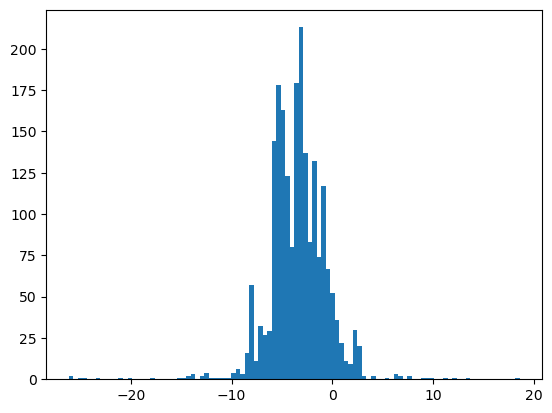

In [92]:
plt.hist(error, bins=100)
plt.show()


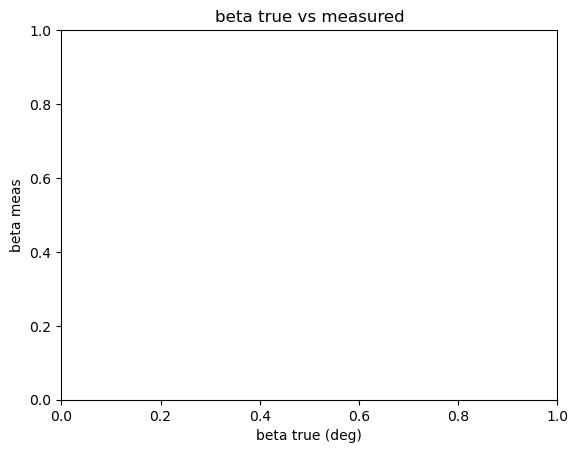

In [93]:
#Plot the angle beta against the true angle:
beta_true = np.zeros_like(data_180[1])
plt.title("beta true vs measured")
plt.ylabel("beta meas")
plt.xlabel("beta true (deg)")
plt.show()
(data_180[9][dgs] + (data_180[1]*0.9/16)[dgs]).reshape(-1,)
freq = np.fft.rfftfreq(len(time[dgs]), time[1]-time[0])